Works with MongoDb, No obsolete Data


In [27]:
import osmnx as ox
import geojson
import pandas as pd
import os

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    geojson_features = []
    for postal_code, geometry in data.items():
        if geometry.is_empty:
            continue  # Skip empty geometries

        coordinates = []

        if geometry.geom_type == 'Polygon':
            coordinates = [list(geometry.exterior.coords)]
        elif geometry.geom_type == 'MultiPolygon':
            coordinates = [list(poly.exterior.coords) for poly in geometry.geoms]
        else:
            raise ValueError(f"Unsupported geometry type: {geometry.geom_type}")

        # Update "type" to "postal_code" and add the corresponding postal code
        feature = {
            "postal_code": postal_code,
            "geometry": {
                "type": geometry.geom_type,
                "coordinates": coordinates
            }
        }

        geojson_features.append(feature)

    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

def main():
    place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

    place_postal_code_polygons = get_place_postal_code_polygons(place_input)
    place_geojson_data = format_geojson_data(place_postal_code_polygons)

    file_name = f"{place_input}_geojson_data.geojson"
    saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

    print(f"{place_input} GeoJSON data saved to {saved_file_path}")

if __name__ == "__main__":
    main()


kassel GeoJSON data saved to c:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\ZIP_Dict_Extractor_Valid\TestGround\V5_Pragmatic_Version\kassel_geojson_data.geojson


Testing Data:

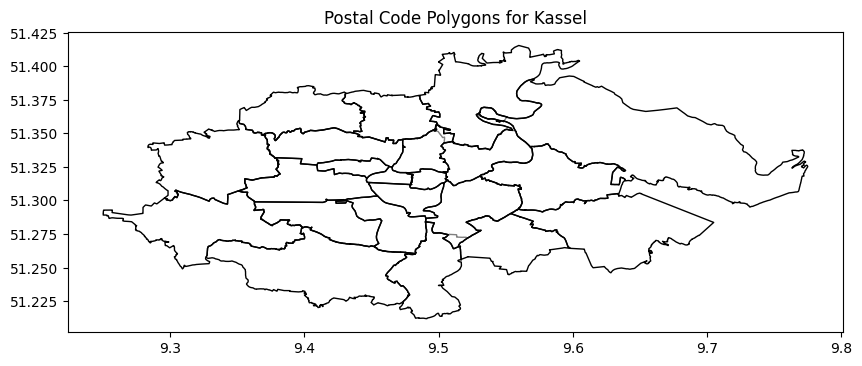

<Axes: >

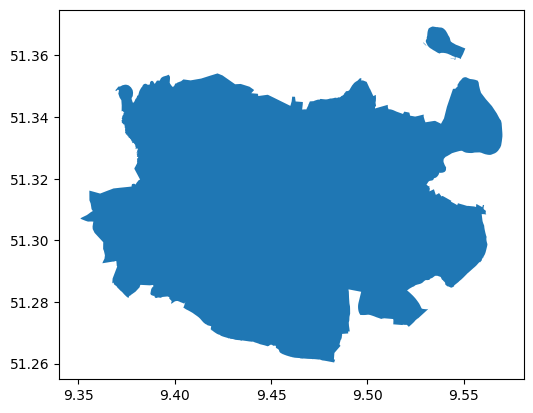

In [14]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    Returns a dictionary mapping postal codes to their respective geometries.
    """
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])
    
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Fetch city/länder boundaries using OSMnx
city_boundaries = ox.geocode_to_gdf(place_input)

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)

# Plotting the data using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
city_boundaries.plot(ax=ax, edgecolor='grey', facecolor='none')
gpd.GeoDataFrame(geometry=list(place_postal_code_polygons.values())).plot(ax=ax, edgecolor='black', facecolor='none')

# Display the plot
plt.title(f"Postal Code Polygons for {place_input}")
plt.show()

city_boundaries.plot()

In [15]:
len(place_postal_code_polygons)

22

In [16]:
place_postal_code_polygons

{'34123': <POLYGON ((9.489 51.292, 9.489 51.293, 9.489 51.293, 9.49 51.294, 9.49 51.29...>,
 '34121': <POLYGON ((9.449 51.313, 9.45 51.313, 9.478 51.312, 9.478 51.312, 9.479 51.3...>,
 '34233': <POLYGON ((9.485 51.378, 9.485 51.378, 9.486 51.378, 9.486 51.378, 9.486 51....>,
 '34125': <POLYGON ((9.503 51.321, 9.504 51.321, 9.504 51.321, 9.506 51.321, 9.507 51....>,
 '34128': <POLYGON ((9.369 51.349, 9.37 51.349, 9.37 51.35, 9.371 51.35, 9.371 51.35, ...>,
 '34131': <POLYGON ((9.351 51.307, 9.352 51.307, 9.352 51.308, 9.353 51.308, 9.354 51....>,
 '34132': <POLYGON ((9.362 51.293, 9.362 51.293, 9.363 51.293, 9.363 51.294, 9.364 51....>,
 '34119': <POLYGON ((9.446 51.315, 9.446 51.317, 9.447 51.317, 9.448 51.318, 9.449 51....>,
 '34130': <POLYGON ((9.409 51.326, 9.41 51.328, 9.412 51.328, 9.414 51.328, 9.42 51.32...>,
 '34134': <POLYGON ((9.43 51.3, 9.431 51.301, 9.433 51.301, 9.434 51.301, 9.442 51.302...>,
 '34117': <POLYGON ((9.476 51.321, 9.478 51.321, 9.48 51.321, 9.482 51.321, 9.48

ESPG Test: Kassel works, Germany doesn't

kassel GeoJSON data saved to c:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\ZIP_Dict_Extractor_Valid\TestGround\V5_Pragmatic_Version\kassel_geojson_data.geojson


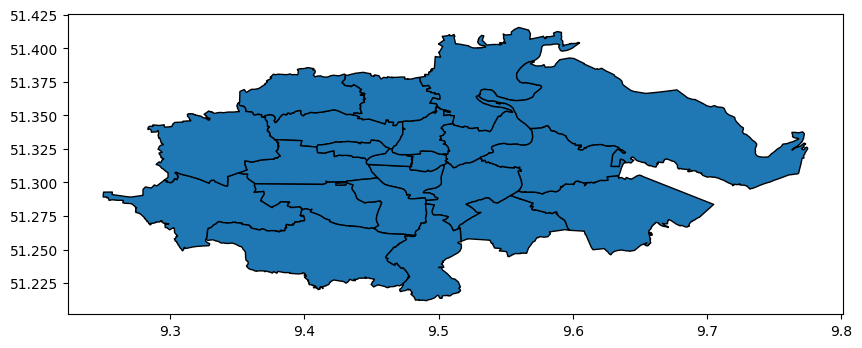

In [31]:
import osmnx as ox
import geojson
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    Returns a dictionary mapping postal codes to their respective geometries.
    """
    try:
        postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})

        df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

        postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
        return postal_code_polygon_dict
    except Exception as e:
        print(f"Error fetching data for {place_name}: {str(e)}")
        return {}


def format_geojson_data(data, crs="EPSG:4326"):
    """
    Formats data into GeoJSON format.
    """
    geojson_features = []
    for postal_code, geometry in data.items():
        if geometry.is_empty:
            continue  # Skip empty geometries

        coordinates = []

        # Transform coordinates to the specified CRS (EPSG:4326 by default)
        if geometry.geom_type == 'Polygon':
            coordinates = [list(shape(geometry).exterior.coords)]
        elif geometry.geom_type == 'MultiPolygon':
            coordinates = [list(shape(poly).exterior.coords) for poly in geometry.geoms]
        else:
            raise ValueError(f"Unsupported geometry type: {geometry.geom_type}")

        # Update "type" to "postal_code" and add the corresponding postal code
        feature = {
            "type": "Feature",
            "properties": {
                "postal_code": postal_code
            },
            "geometry": {
                "type": geometry.geom_type,
                "coordinates": coordinates
            }
        }

        geojson_features.append(feature)

    # Create a GeoJSON FeatureCollection
    geojson_data = {
        "type": "FeatureCollection",
        "features": geojson_features
    }

    return geojson_data


def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

def plot_map_with_data(gdf, crs):
    """
    Plots the map with GeoJSON data using GeoPandas and matplotlib.
    """
    # Set the CRS for the GeoDataFrame
    gdf.crs = crs
    
    # Plot the map with the GeoDataFrame and apply the specified projection
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.to_crs(crs).plot(ax=ax, edgecolor='k')
    
    # Display the map
    plt.show()

def main():
    place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

    place_postal_code_polygons = get_place_postal_code_polygons(place_input)
    
    # Set the Coordinate Reference System (CRS) for the GeoJSON data
    crs = "EPSG:25832"
    
    place_geojson_data = format_geojson_data(place_postal_code_polygons, crs)

    file_name = f"{place_input}_geojson_data.geojson"
    saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

    print(f"{place_input} GeoJSON data saved to {saved_file_path}")

    # Plot the map with GeoJSON data
    plot_map_with_data(gpd.GeoDataFrame.from_features(place_geojson_data['features']), crs)

if __name__ == "__main__":
    main()
